# Customer Shopping Trends

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [36]:
shop = pd.read_csv("./shopping_trends_updated.csv", dtype_backend="pyarrow", index_col="Customer ID")
shop.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [37]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 1 to 3900
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Age                     3900 non-null   int64[pyarrow] 
 1   Gender                  3900 non-null   string[pyarrow]
 2   Item Purchased          3900 non-null   string[pyarrow]
 3   Category                3900 non-null   string[pyarrow]
 4   Purchase Amount (USD)   3900 non-null   int64[pyarrow] 
 5   Location                3900 non-null   string[pyarrow]
 6   Size                    3900 non-null   string[pyarrow]
 7   Color                   3900 non-null   string[pyarrow]
 8   Season                  3900 non-null   string[pyarrow]
 9   Review Rating           3900 non-null   double[pyarrow]
 10  Subscription Status     3900 non-null   string[pyarrow]
 11  Shipping Type           3900 non-null   string[pyarrow]
 12  Discount Applied        3900 non-null  

### Purchase Amount Variation

<Axes: ylabel='Density'>

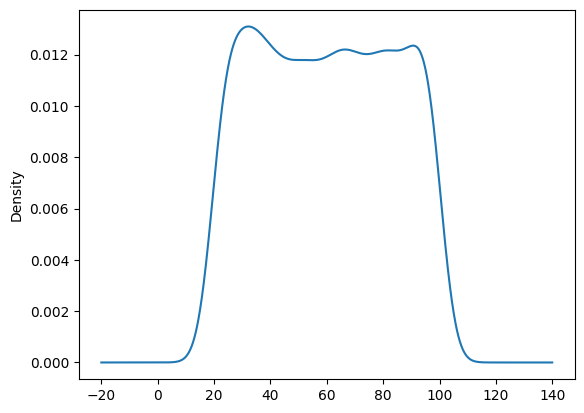

In [43]:
shop["Purchase Amount (USD)"].plot(kind='kde', use_index=False)

###  Shopping Frequency Customers Age

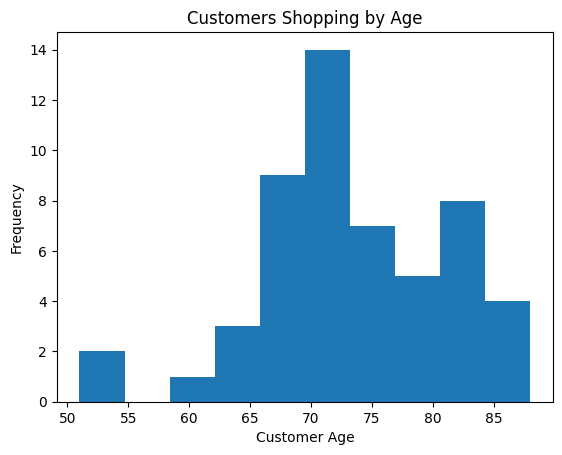

In [33]:
_ = shop.Age.value_counts().plot(kind='hist', title="Customers Shopping by Age", xlabel='Customer Age', use_index=False)

### Average Review Rating by Gender

In [51]:
shop.groupby("Gender")["Review Rating"].mean()

Gender
Female    3.741426
Male      3.753959
Name: Review Rating, dtype: double[pyarrow]

*Both are equally likely*

### Which Gender Spends More?

In [68]:
shop.groupby("Gender")["Purchase Amount (USD)"].mean()

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: double[pyarrow]

*Females are more likely to spend more*

### Most common sizes

In [71]:
shop["Size"].value_counts(ascending=False)

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64[pyarrow]

### Most Common Payment Methods

In [72]:
shop["Payment Method"].value_counts(ascending=False)

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64[pyarrow]